In [1]:
import quandl

In [2]:
import pandas as pd

In [3]:
reliance=quandl.get("NSE/RELIANCE", authtoken="FQK_nsf7J8atcWYZTrWV")

In [5]:
reliance.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-07-24,1122.0,1126.75,1107.40,1111.00,1110.95,4469144.0,49851.33
2018-07-25,1110.0,1123.00,1104.20,1112.65,1115.15,5949680.0,66410.93
2018-07-26,1110.1,1121.50,1107.80,1112.10,1110.65,6424867.0,71566.86
2018-07-27,1119.5,1137.40,1112.15,1128.00,1129.85,6679468.0,75306.02
2018-07-30,1130.0,1157.30,1128.00,1152.00,1151.40,13872467.0,158612.11


In [8]:
import matplotlib.pyplot as plt

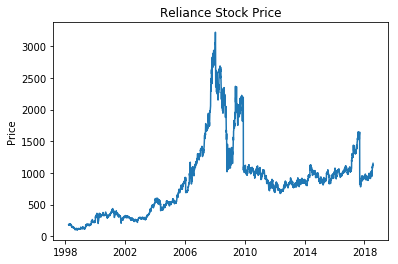

In [11]:
plt.plot(reliance.index,reliance['Close'])
plt.title('Reliance Stock Price')
plt.ylabel('Price');
plt.show()

In [12]:
import fbprophet

In [14]:
reliance['year']=reliance.index.year

In [15]:
reliance.reset_index(level=0,inplace=True )

In [16]:
reliance = reliance.rename(columns={'Date': 'ds', 'Close': 'y'})

In [18]:
rel_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
rel_prophet.fit(reliance)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
rel_forecast = rel_prophet.make_future_dataframe(periods=365 * 2, freq='D')

In [20]:
rel_forecast = rel_prophet.predict(rel_forecast)

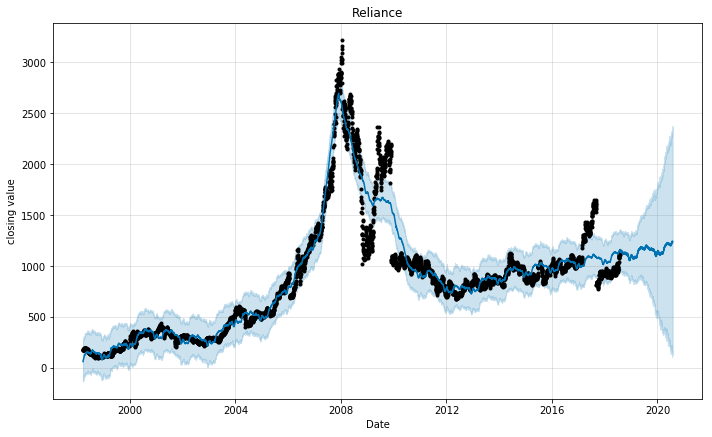

In [21]:
rel_prophet.plot(rel_forecast, xlabel = 'Date', ylabel = 'closing value')
plt.title('Reliance')
plt.show();

In [25]:
rel_prophet.changepoints[:1000]

162    1998-11-16
325    1999-07-07
487    2000-02-24
650    2000-10-20
812    2001-06-13
975    2002-02-07
1137   2002-09-30
1300   2003-05-29
1462   2004-01-14
1624   2004-09-03
1787   2005-04-29
1949   2005-12-20
2112   2006-08-14
2274   2007-04-11
2437   2007-11-30
2599   2008-07-28
2761   2009-03-31
2924   2009-11-30
3086   2010-07-26
3249   2011-03-17
3411   2011-11-14
3574   2012-07-04
3736   2013-02-26
3899   2013-10-24
4061   2014-06-19
Name: ds, dtype: datetime64[ns]

In [26]:
import numpy as np

In [31]:
Reliance1 = pd.DataFrame(rel_prophet, columns=['rel_forecast']).to_csv('Reliance1.csv')

ValueError: DataFrame constructor not properly called!

In [32]:
rel_forecast.to_csv('Reliance1.csv')